# Simulation and Visualization of Path Integral

path-integral derivation of one-dimentional diffusion process
$$
\begin{align}
P(x_N, t_N) &= \frac{1}{2\pi} \int^{\infty}_{-\infty} \rm{d}x_0 \sqrt{\frac{\pi}{D(t_N - t_0)}} 
\exp \left\{ - \frac{[\ (x_N - x_0) - u(t_N - t_0) \ ]^2}{4D(t_N-t_0)} \right\} \delta(x_0-x_I) \nonumber \\
            &= \sqrt{\frac{1}{4\pi D(t_N - t_0)}} \exp \left\{ - \frac{[\ (x_N - x_I) - u(t_N - t_0) \ ]^2}{4D(t_N-t_0)} \right\} \nonumber
\end{align}
$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def P(
      xn_xi: np.ndarray,
      tn_t0: float, 
      D: float,
      u: float,
    ):
    """
    xn_xi : x_N - x_I [m]
    tn_t0 : t_N - t_0 [sec]
    D : diffusion coefficient
    u : velocity
    """

    p = np.sqrt(1.0 / 4.0 * np.pi * D * tn_t0) *\
        np.exp(-((xn_xi) - u * (tn_t0))**2 / (4.0 * D * tn_t0))

    return p

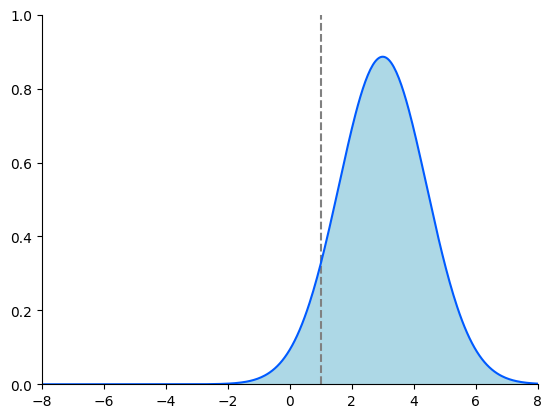

In [16]:
# simulation params
num_of_samples = 401
xmin, xmax = -8.0, +8.0 # [m]
xi = 1.0 # [m]
x = np.linspace(xmin, xmax, num_of_samples)
x_xi = x - np.ones(num_of_samples) * xi
t0 = 0.0 # [sec]
t = 1.0 # [sec]
t_t0 = t - t0
D = 1.0 # [m^2/s]
u = 2.0 # [m/s]

# make figure
fig, ax = plt.subplots()

# layout settings
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# set axis limits
ax.set_xlim(xmin, xmax)
ax.set_ylim( 0,  1.0)

# draw x = x_i
ax.axvline(x=xi, linestyle="dashed", color="gray")

# draw P(x) with fill & plot
ax.fill_between(x, P(x_xi, t_t0, D, u), fc='#add8e6')
ax.plot(x, P(x_xi, t_t0, D, u), color="#005AFF")

# show plot
plt.show()